In [1]:
#importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
features=pd.read_csv("data/training_set_features.csv")
labels=pd.read_csv("data/training_set_labels.csv")

#Merging the train features and labels
data=features.merge(labels, on="respondent_id")

#Shape of the data after merging
print("Shape of the data after merging:\n", data.shape)

# Data info
print("\n\n Data info:\n", data.info())

# Check for null values
missing_summary = data.isnull().sum()
print("\n Missing values:\n", missing_summary[missing_summary > 0])

Shape of the data after merging:
 (26707, 38)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition       

In [3]:
#HANDLING MISSING DATA

# 1. Drop employment columns (50%+ missing)
data = data.drop(['employment_industry', 'employment_occupation'], axis=1)
print(data.columns)


#2. Filling missing with NA (45.96% missing)
data['health_insurance'] = data['health_insurance'].fillna('NA')

# Separate numerical and categorical
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

print("\n Numerical features:\n ", list(numerical_cols))
print("\n Categorical features:\n", list(categorical_cols))


# 3. Filling numerical columns with median
for col in numerical_cols:
    if data[col].isnull().sum() > 0:
        median_val = data[col].median()
        data[col].fillna(median_val, inplace=True)

#4. Filling categorical columns with mode
for col in categorical_cols:
    if data[col].isnull().sum() > 0:
        mode_val = data[col].mode()[0]
        data[col].fillna(mode_val, inplace=True)

#Drop other unnecessary columns
data.drop(columns=["hhs_geo_region", "census_msa"],inplace=True)

data.info()

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'h1n1_vaccine',
       'seasonal_vaccine'],
      dtype='object')

 Numerical features:
  ['respondent_id', 'h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'b

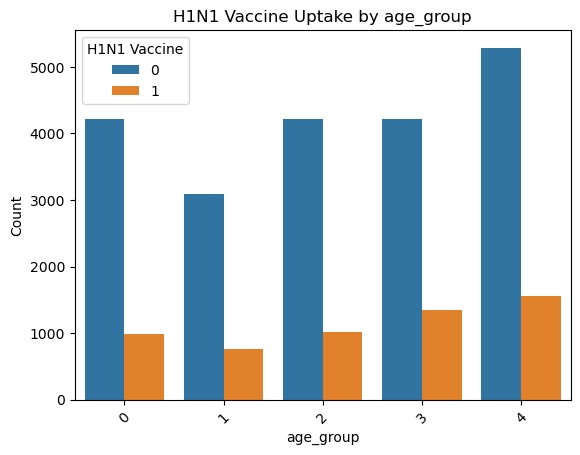

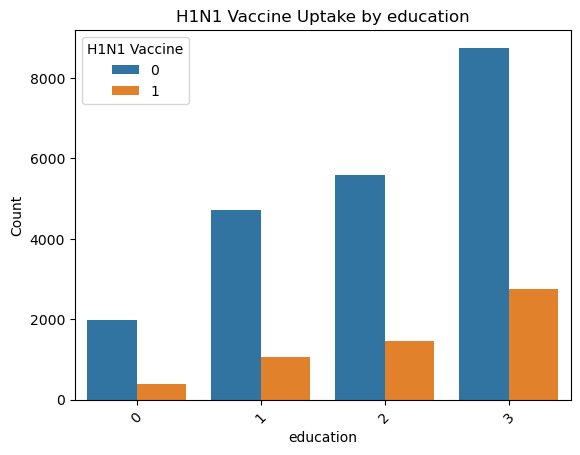

ValueError: Could not interpret input 'race'

In [13]:
# Quick loop to inspect how key features relate to H1N1 vaccine
key_features = ['age_group', 'education', 'race', 'income_poverty',
                'doctor_recc_h1n1', 'opinion_h1n1_vacc_effective']

for feature in key_features:
    sns.countplot(data=data, x=feature, hue=data['h1n1_vaccine'].astype(str))
    plt.xticks(rotation=45)
    plt.title(f"H1N1 Vaccine Uptake by {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.legend(title="H1N1 Vaccine")
    plt.show()



AttributeError: 'numpy.int64' object has no attribute 'startswith'

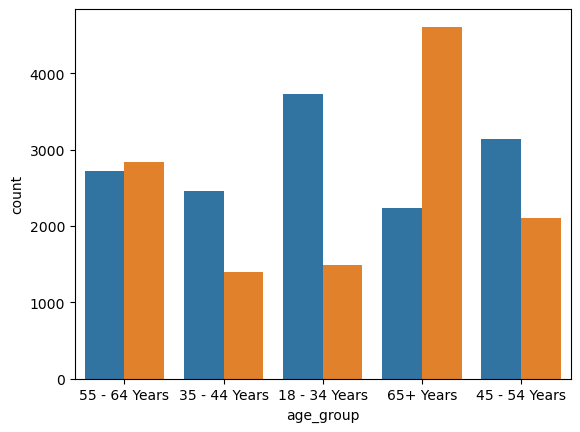

In [5]:
key_features = ['age_group', 'education', 'race', 'income_poverty',
                'doctor_recc_h1n1', 'opinion_h1n1_vacc_effective']

for feature in key_features:
    sns.countplot(data=data, x=feature, hue='seasonal_vaccine')
    plt.xticks(rotation=45)
    plt.title(f"Seasonal Vaccine Uptake by {feature}")
    plt.show()


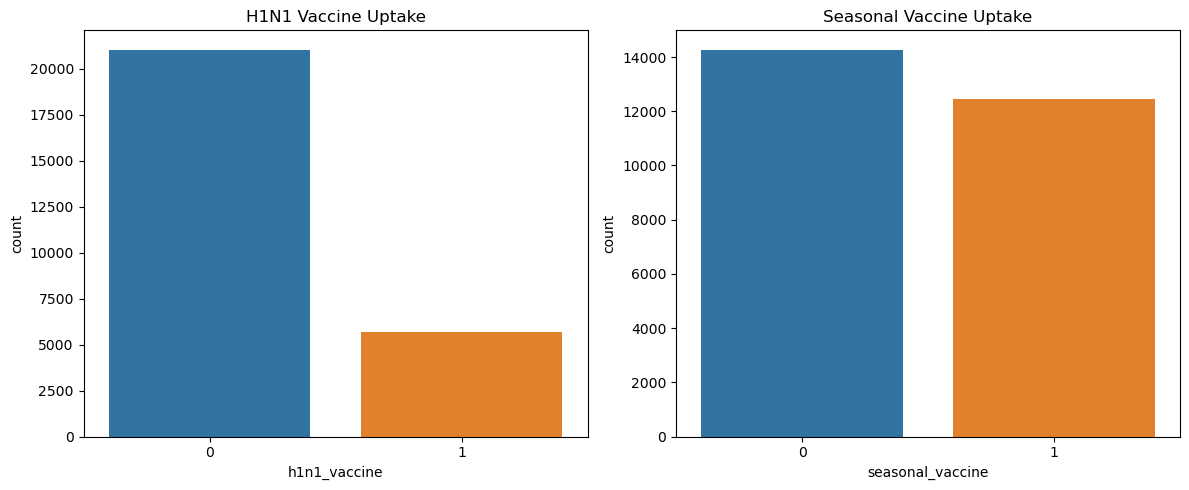

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(data=data, x='h1n1_vaccine', ax=axes[0])
axes[0].set_title('H1N1 Vaccine Uptake')

sns.countplot(data=data, x='seasonal_vaccine', ax=axes[1])
axes[1].set_title('Seasonal Vaccine Uptake')

plt.tight_layout()
plt.show()


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26707 non-null  float64
 2   h1n1_knowledge               26707 non-null  float64
 3   behavioral_antiviral_meds    26707 non-null  float64
 4   behavioral_avoidance         26707 non-null  float64
 5   behavioral_face_mask         26707 non-null  float64
 6   behavioral_wash_hands        26707 non-null  float64
 7   behavioral_large_gatherings  26707 non-null  float64
 8   behavioral_outside_home      26707 non-null  float64
 9   behavioral_touch_face        26707 non-null  float64
 10  doctor_recc_h1n1             26707 non-null  float64
 11  doctor_recc_seasonal         26707 non-null  float64
 12  chronic_med_condition        26707 non-null  float64
 13  child_under_6_mo

In [8]:
#FEATURE ENGINEERING

# Combine household features
data['household_size'] = data['household_adults'] + data['household_children']

#Combine doctor recommendation column
data['doctor_recc_both'] = data['doctor_recc_h1n1'] + data['doctor_recc_seasonal']


#Combine multiple related behavioral flags to create an overall "cautious behavior" indicator.
safe_behaviors = [
    'behavioral_avoidance',
    'behavioral_face_mask',
    'behavioral_wash_hands',
    'behavioral_large_gatherings',
    'behavioral_outside_home',
    'behavioral_touch_face'
]
data['safe_behavior_score'] = data[safe_behaviors].sum(axis=1)

# Map to numerical: 1.0 = Yes, 0.0 = No, NA = Unknown
data['health_insurance'] = data['health_insurance'].map({1.0: 1, 0.0: 0})
data['health_insurance'] = data['health_insurance'].fillna(-1)  # -1 = Unknown

#Eductaion column
edu_order = {
    '< 12 Years': 0,
    '12 Years': 1,
    'Some College': 2,
    'College Graduate': 3
}
data['education'] = data['education'].map(edu_order)

#Income column
inc_order = {
    'Below Poverty': 0,
    '<= $75,000, Above Poverty': 1,
    '> $75,000': 2
}
data['income_poverty'] = data['income_poverty'].map(inc_order)

#Age group column
age_order = {
    '18 - 34 Years': 0,
    '35 - 44 Years': 1,
    '45 - 54 Years': 2,
    '55 - 64 Years': 3,
    '65+ Years': 4
}
data['age_group'] = data['age_group'].map(age_order)


#One-Hot Encode Nominal Categories
data = pd.get_dummies(data, columns=[
    'race', 'sex', 'marital_status',
    'rent_or_own', 'employment_status'
], drop_first=True)  # Drop first to avoid multicollinearity


#Drop unnecessary columns
data.drop(columns=['household_adults', 'household_children', "doctor_recc_h1n1", "doctor_recc_seasonal"] + safe_behaviors, inplace=True)


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 30 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   respondent_id                         26707 non-null  int64  
 1   h1n1_concern                          26707 non-null  float64
 2   h1n1_knowledge                        26707 non-null  float64
 3   behavioral_antiviral_meds             26707 non-null  float64
 4   chronic_med_condition                 26707 non-null  float64
 5   child_under_6_months                  26707 non-null  float64
 6   health_worker                         26707 non-null  float64
 7   health_insurance                      26707 non-null  float64
 8   opinion_h1n1_vacc_effective           26707 non-null  float64
 9   opinion_h1n1_risk                     26707 non-null  float64
 10  opinion_h1n1_sick_from_vacc           26707 non-null  float64
 11  opinion_seas_va

In [10]:
corr_h1n1 = data.corr()['h1n1_vaccine'].drop('h1n1_vaccine')
corr_h1n1_sorted = corr_h1n1.sort_values(ascending=False)
print(corr_h1n1_sorted)


seasonal_vaccine                        0.377143
doctor_recc_both                        0.335635
opinion_h1n1_risk                       0.320580
opinion_h1n1_vacc_effective             0.267352
opinion_seas_risk                       0.255874
health_insurance                        0.242393
opinion_seas_vacc_effective             0.177799
health_worker                           0.168056
h1n1_concern                            0.121574
h1n1_knowledge                          0.117771
chronic_med_condition                   0.094360
safe_behavior_score                     0.076697
opinion_h1n1_sick_from_vacc             0.074580
child_under_6_months                    0.066712
education                               0.061739
income_poverty                          0.052911
age_group                               0.041074
behavioral_antiviral_meds               0.040226
race_White                              0.030887
employment_status_Not in Labor Force    0.013065
opinion_seas_sick_fr

In [11]:
corr_s1 = data.corr()['seasonal_vaccine'].drop('seasonal_vaccine')
corr_s1_sorted = corr_s1.sort_values(ascending=False)
print(corr_s1_sorted)


opinion_seas_risk                       0.386916
h1n1_vaccine                            0.377143
opinion_seas_vacc_effective             0.358869
doctor_recc_both                        0.318217
age_group                               0.277454
opinion_h1n1_risk                       0.215650
opinion_h1n1_vacc_effective             0.203187
chronic_med_condition                   0.169465
h1n1_concern                            0.154488
employment_status_Not in Labor Force    0.145819
safe_behavior_score                     0.129281
health_worker                           0.126977
h1n1_knowledge                          0.119779
health_insurance                        0.110874
race_White                              0.100314
income_poverty                          0.063805
education                               0.056681
opinion_h1n1_sick_from_vacc             0.027964
child_under_6_months                    0.013424
behavioral_antiviral_meds               0.006013
respondent_id       

## Building a preprocessing pipeline


## Defining feature types.

In [12]:
# Drop identifier and target columns
features = data.drop(columns=["respondent_id", "h1n1_vaccine", "seasonal_vaccine"])

# Define numerical, ordinal, and nominal features
numerical_features = ['household_income', 'household_size', 'safe_behavior_score']
ordinal_features = ['age_group', 'education', 'income_poverty', 'employment_status', 'health_insurance', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc']  # example list — adjust based on your encoding
nominal_features = [col for col in features.columns if col not in numerical_features + ordinal_features]


In [14]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer


### Creating preprocessing steps

In [15]:
# Numeric pipeline: median imputation + scaling
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Ordinal pipeline: impute then ordinal encode
ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder())
])

# Nominal pipeline: impute then one-hot encode
nominal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])


 ### Combine into a ColumnTransformer

In [16]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('ord', ordinal_transformer, ordinal_features),
        ('nom', nominal_transformer, nominal_features)
    ])


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Define full pipeline with preprocessing and logistic regression
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])


### Identify Irrelevant Features



In [20]:
# Percentage of missing values per column
missing_percent = data.isnull().mean().sort_values(ascending=False)
print(missing_percent[missing_percent > 0.4])  # show those with > 40% missing


Series([], dtype: float64)


In [21]:
low_variance_cols = [col for col in data.columns if data[col].nunique() <= 1]
print("Low-variance columns:", low_variance_cols)


Low-variance columns: []


No low-variance columns were found.

Common irrelevant features in this vaccine dataset might include:

respondent_id: just an identifier

In [23]:
# Drop respondent_id
data_cleaned = data.drop(columns=['respondent_id'])

# Save to CSV
data_cleaned.to_csv("cleaned_vaccine_data.csv", index=False)
print("Cleaned dataset saved as 'cleaned_vaccine_data.csv'")


Cleaned dataset saved as 'cleaned_vaccine_data.csv'
